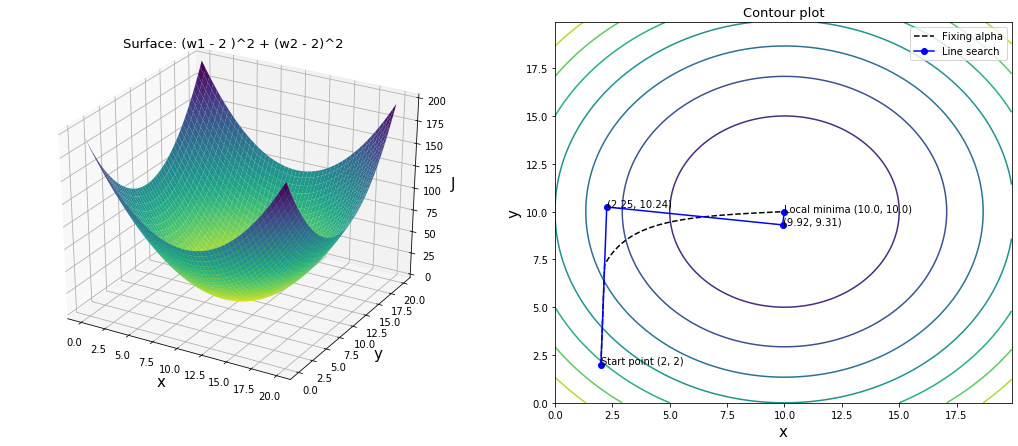

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# Compute gradient numerically using first principle
def numeric_gradient(obj, x, y) -> np.ndarray:
    dx, dy = 0.05*x, 0.05*y
    return np.array([
        (obj(x+dx, y) - obj(x-dx, y))/(2*dx),
        (obj(x, y+dy) - obj(x, y-dy)/(2*dy))
    ])


#4.(a) Fixing the value of alpha
def steepest_descent_1(obj, x0, errlim=1e-5):
    opt = x0
    alpha = 0.01

    intm = [opt]
    while np.linalg.norm(numeric_gradient(obj, *opt)) > errlim:
        opt = np.subtract(opt, alpha * numeric_gradient(obj, *opt))
        intm.append(opt)
    return opt, np.array(intm)

def find_f_sv(f_mv, start, drx):
    def parametric(alpha):
        return f_mv(*(start + alpha*drx))
    return parametric

def exhaustive_search(obj, a=-1000, b=1000, n=10):
    x1 = a
    dx = (b - a) / n
    x2 = x1 + dx
    x3 = x2 + dx
    while not (obj(x1) >= obj(x2) and obj(x2) <= obj(x3)):
        x1 = x2
        x2 = x3
        x3 = x2 + dx
        if x3 > b:
            return False, None, None
    return True, (x1, x3)

def interval_halving(obj, a, b, errlim=1e-5):
    while abs(b - a) > errlim:
        xm = (a + b) / 2
        x1 = (a + xm) / 2
        x2 = (xm + b) / 2
        if obj(x1) < obj(xm):
            b, xm = xm, x1
        else:
            if obj(x2) < obj(xm):
                a, xm = xm, x2
            else:
                a, b = x1, x2

    return (a + b) / 2


#4(b): Find alpha using line search
def steepest_descent_2(obj, x0, errlim=1e-5):
    opt = x0
    intm = [opt]#intermediate values
    while np.linalg.norm(numeric_gradient(obj, *opt)) > errlim:
        s = -numeric_gradient(obj, *opt)
        obj_sv = find_f_sv(obj, opt, s)
        found, (a, b) = exhaustive_search(obj_sv, n=1000)
        if found:
            alpha = interval_halving(obj_sv, a, b)
            opt = np.add(opt, alpha * s)
            intm.append(opt)
    return opt, np.array(intm)


#our objective function
def f(w1, w2):
        return (w1 - 10) ** 2 + (w2 - 10) ** 2

start = np.array([2, 2])
opt_1, points_1 = steepest_descent_1(f, start)
opt_2, points_2 = steepest_descent_2(f, start, errlim=0.3)

#Plotting
w1 = np.arange(0, 20, 0.1)
w2 = np.arange(0, 20, 0.1)
X, Y = np.meshgrid(w1, w2)
J = f(X,Y)
fig = plt.figure(figsize=(18,7))
ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(X, Y, J,cmap='viridis_r')
ax.set_title("Surface: (w1 - 2 )^2 + (w2 - 2)^2 ", fontsize = 13)
ax.set_xlabel('x', fontsize = 15)
ax.set_ylabel('y', fontsize = 15)
ax.set_zlabel('J', fontsize = 15)
ax = fig.add_subplot(122)
ax.contour(X, Y, J)
ax.set_title("Contour plot", fontsize = 13)
ax.set_xlabel('x', fontsize = 15)
ax.set_ylabel('y', fontsize = 15)

ax.plot(points_1[:, 0], points_1[:, 1], 'k--', label='Fixing alpha')
ax.plot(points_2[:, 0], points_2[:, 1], 'bo-', label='Line search')
ax.annotate(f'Start point {tuple(start)}', start)
ax.annotate(f'Local minima {tuple(map(lambda x: round(x, 2), points_2[-1]))}', points_2[-1])

for point in points_2[1:-1]:
    ax.annotate(f'{tuple(map(lambda x: round(x, 2), point))}', point)

plt.legend()
plt.show()